# Sales Analysis

## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

### Read in updated dataframe

In [4]:
all_data = pd.read_csv('Merged_Data/all_data.csv')

In [159]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### Drop all empty rows and reset index

In [5]:
all_data = all_data.dropna().reset_index(drop=True)

### Check for rows were the header repeats

In [4]:
all_data.loc[all_data['Quantity Ordered']=='Quantity Ordered'].shape[0]

355

### Drop rows where the header repeats

In [6]:
all_data = all_data.loc[all_data['Quantity Ordered'] != 'Quantity Ordered']

### Change Column Data Types

In [6]:
# Check the data types
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
# Change the data types
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data['Order ID'] = pd.to_numeric(all_data['Order ID'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [8]:
all_data.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## Data Exploration

In [9]:

def last_tick(num, step):
    """
    This function provides the highest tick in each graph.
    """

    stop = int(np.ceil(num/step)) * step + 1
    
    return np.arange(0, stop, step)

### Question 1: What was the best month for sales? How much was earned that month?

In [144]:

monthly_sales_df = all_data[['Order Date', 'Quantity Ordered', 'Price Each']]

monthly_sales_df.insert(1, 'Order Month', monthly_sales_df['Order Date'].dt.month)

monthly_sales_df = monthly_sales_df.groupby('Order Month').sum(numeric_only=True)

monthly_sales_df

,Quantity Ordered,Price Each
Order Month,,
1,10903,1811768.38
2,13449,2188884.72
3,17005,2791207.83
4,20558,3367671.02
5,18667,3135125.13
6,15253,2562025.61
7,16072,2632539.56
8,13448,2230345.42
9,13109,2084992.09


In [145]:
months = pd.to_datetime(monthly_sales_df.index, format='%m')
months.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Order Month')

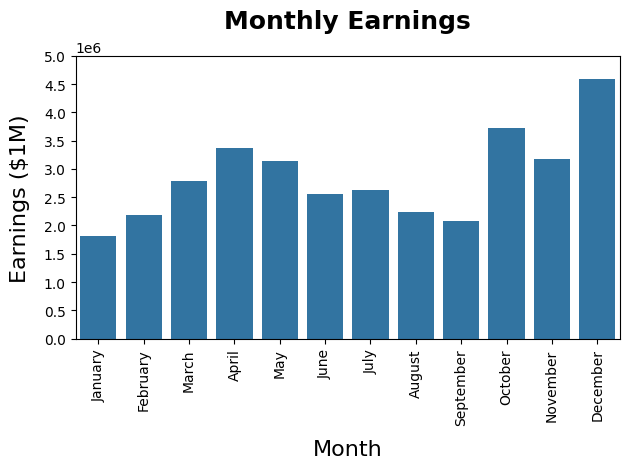

In [236]:
fig = sns.barplot(x=months.month_name(), y=monthly_sales_df['Price Each'])

fig.set_title('Monthly Earnings', fontdict={'fontsize':18, 'fontweight':'bold'}, pad=20)
fig.set_xlabel('Month', fontdict={'fontsize':16}, labelpad=10)
fig.set_ylabel('Earnings ($1M)', fontdict={'fontsize':16}, labelpad=10)

fig.set_xticks(months.month_name())
fig.set_xticklabels(months.month_name(), rotation=90)

fig.set_yticks(ticks=last_tick(monthly_sales_df['Price Each'].max(), 500000))

plt.tight_layout()
plt.show()

**Answer:** December was the best month for sales, and earned over 4.5 million dollars.

### Question 2: What city ordered the most product?

In [194]:
cities_df = all_data[['Purchase Address', 'Quantity Ordered']]

cities = cities_df['Purchase Address'].str.extract(r'^[^,]+,\s*([^,]+,\s[A-Z]{2})')

cities_df.insert(1, 'City', cities)

cities_df = cities_df.groupby('City').sum(numeric_only=True)

cities_df

,Quantity Ordered
City,
"Atlanta, GA",16602
"Austin, TX",11153
"Boston, MA",22528
"Dallas, TX",16730
"Los Angeles, CA",33289
"New York City, NY",27932
"Portland, ME",2750
"Portland, OR",11303
"San Francisco, CA",50239


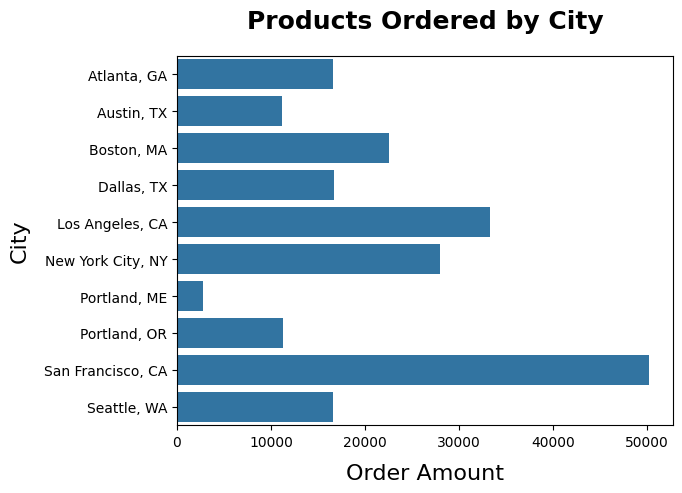

In [383]:
fig = sns.barplot(y=cities_df.index, x=cities_df['Quantity Ordered'], orient='h')

fig.set_title('Products Ordered by City', fontdict={'fontsize':18, 'fontweight':'bold'}, pad=20)
fig.set_xlabel('Order Amount', fontdict={'fontsize':16}, labelpad=10)
fig.set_ylabel('City', fontdict={'fontsize':16}, labelpad=10)

plt.show()

**Answer:** San Fransisco ordered the most products.

### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [223]:
sales_time_ser = all_data.groupby(all_data['Order Date'].dt.hour).count()['Quantity Ordered']
sales_time_ser

Order Date
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64

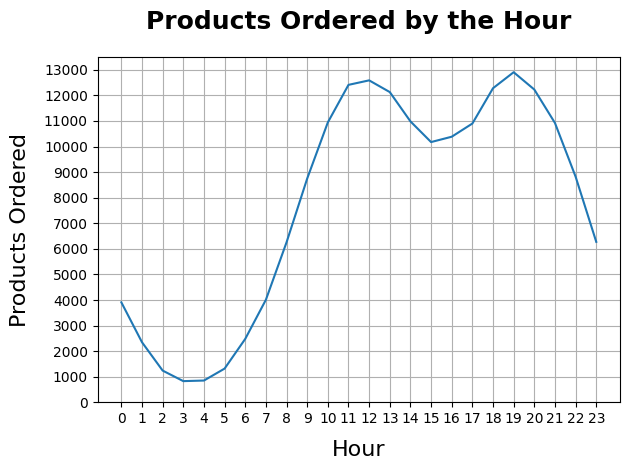

In [376]:
fig = sns.lineplot(x=sales_time_ser.index, y=sales_time_ser.values)

fig.set_title('Products Ordered by the Hour', fontdict={'fontsize':18, 'fontweight':'bold'}, pad=20)
fig.set_xlabel('Hour', fontdict={'fontsize':16}, labelpad=10)
fig.set_ylabel('Products Ordered', fontdict={'fontsize':16}, labelpad=10)

fig.set_xticks(ticks=sales_time_ser.index)
fig.set_yticks(ticks=last_tick(sales_time_ser.values.max(), 1000))

plt.tight_layout()
plt.grid()
plt.show()

**Answer:** Due to the data showing that both 12 and 7 pm being peak hours for orders, I recomend advertising after 11 am and 6 pm.

### Question 4: What products are most often sold together?

In [384]:
ordered_together_df = all_data.loc[all_data.duplicated(['Order ID'], keep=False) == True, ['Order ID', 'Product']].reset_index(drop=True)

ordered_together_df.head()

,Order ID,Product
0,176560,Google Phone
1,176560,Wired Headphones
2,176574,Google Phone
3,176574,USB-C Charging Cable
4,176585,Bose SoundSport Headphones


In [385]:
key_arr = ordered_together_df['Order ID'].unique()

order_dict = {}
count = 0
for n in key_arr:
    order_dict[key_arr[count]] = tuple(ordered_together_df.loc[ordered_together_df['Order ID'] == key_arr[count], 'Product'])
    count+=1

In [387]:
order_freq_ser = pd.Series(data=order_dict.values()).value_counts()
order_freq_ser.index = order_freq_ser.index.astype('string')

order_freq_ser

('iPhone', 'Lightning Charging Cable')               882
('Google Phone', 'USB-C Charging Cable')             856
('iPhone', 'Wired Headphones')                       361
('Vareebadd Phone', 'USB-C Charging Cable')          312
('Google Phone', 'Wired Headphones')                 303
                                                    ... 
('Google Phone', 'USB-C Charging Cable', 'Wire...      1
('34in Ultrawide Monitor', 'LG Washing Machine')       1
('20in Monitor', 'iPhone')                             1
('Google Phone', 'USB-C Charging Cable', 'Wire...      1
('LG Washing Machine', 'AA Batteries (4-pack)')        1
Length: 366, dtype: int64

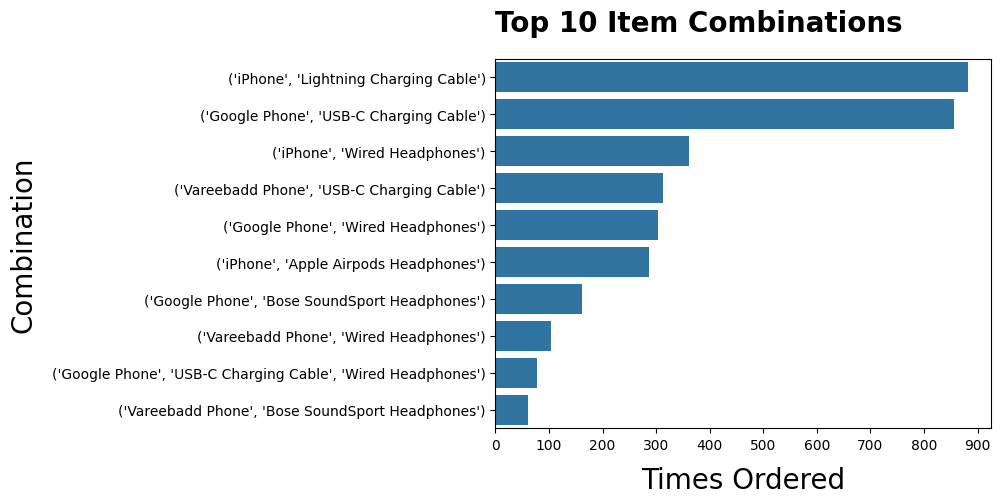

In [391]:
top_items = 10

fig = sns.barplot(y=order_freq_ser.index[:top_items], x=order_freq_ser.values[:top_items], orient='h')

fig.set_title('Top ' + str(top_items) + ' Item Combinations', fontdict={'fontsize':20, 'fontweight': 'bold'}, pad=20, loc='left')
fig.set_xlabel('Times Ordered', fontdict={'fontsize':20}, labelpad=10)
fig.set_ylabel('Combination', fontdict={'fontsize':20}, labelpad=10)

fig.set_xticks(last_tick(order_freq_ser.values.max(), 100), fontsize=14)

plt.show()

**Answer:** The iPhone and Lightning Charging Cable item combination is the most frequently ordered combination.

### Question 5: What product was ordered the most? Why do you think it was ordered the most?

In [21]:
product_quantity = all_data.groupby('Product').sum(numeric_only=True)['Quantity Ordered']
product_quantity

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [22]:
product_price = all_data.groupby('Product').mean(numeric_only=True)['Price Each']
product_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

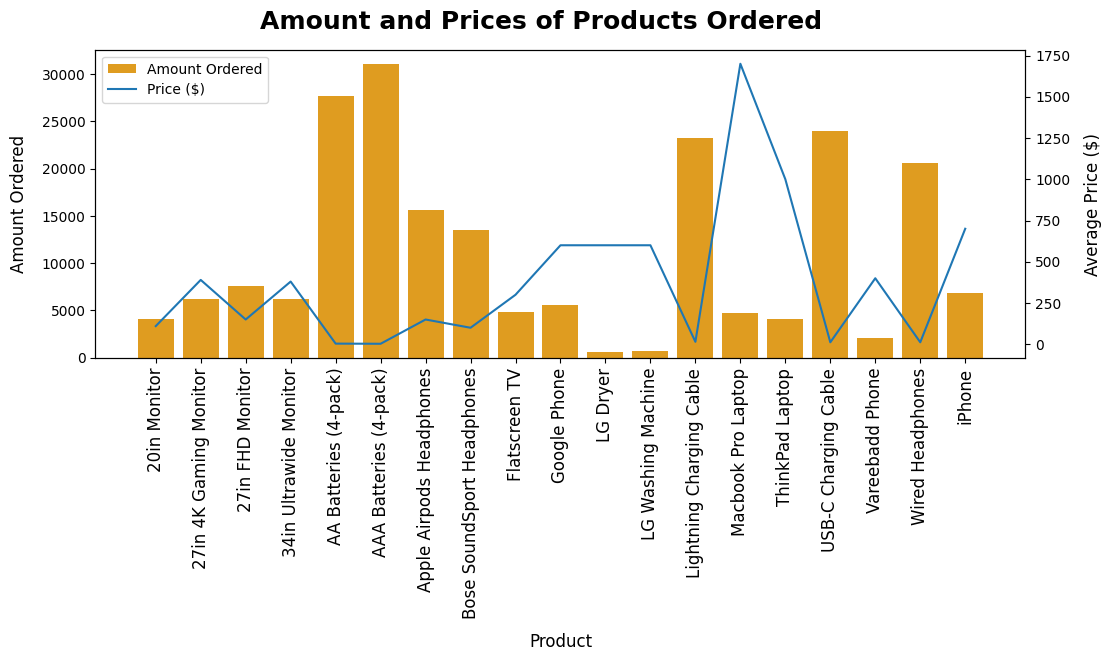

In [23]:
fig, ax1 = plt.subplots()

sns.barplot(x=product_quantity.index, y=product_quantity.values, ax=ax1, color='orange', label='Amount Ordered')
ax2 = ax1.twinx()
sns.lineplot(x=product_price.index, y=product_price.values, ax=ax2, label='Price ($)')

ax1_h, ax1_l = ax1.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

ax1.legend().remove()
ax2.legend(ax1_h + ax2_h, ax1_l + ax2_l, loc=2)

fig.set_size_inches(12,4)

fig.suptitle('Amount and Prices of Products Ordered ', size=18, weight='bold')

ax1.set_ylabel('Amount Ordered', fontdict={'fontsize':12}, labelpad=10)
ax2.set_ylabel('Average Price ($)', fontdict={'fontsize':12}, labelpad=10)
ax1.set_xlabel('Product', fontdict={'fontsize':12}, labelpad=10)

ax1.set_xticks(product_quantity.index)
ax1.set_xticklabels(product_quantity.index, rotation=90, fontdict={'fontsize':12})

plt.show()

**Answer:** The AAA Batteries (4-pack) was the most ordered product. I believe this is due to its low price.